In [12]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import xarray as xr
import copy
import csv
import matplotlib
import cartopy.feature as cft
import cartopy.crs as ccrs
from dask.distributed import Client
import climtas.nci

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [13]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [3]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44709,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:43423,Total threads: 1
Dashboard: /proxy/34293/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:44353,


In [4]:
session = cc.database.create_session()

OperationalError: (sqlite3.OperationalError) attempt to write a readonly database
[SQL: PRAGMA user_version]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [5]:
data = copy.deepcopy(exptdata.exptdict) 

### load data

In [14]:
dataset1 = pd.read_csv('4.1.0 Strait_trans/FE_trans(1).csv')
dataset2 = pd.read_csv('4.1.0 Strait_trans/sum of outputs(1).csv')
# dataset2 = pd.read_csv('4.1.0 Strait_trans/AB_BC(1).csv')
X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

w = 1

x1 = np.convolve(X1, np.ones(w), 'valid') / w
x2 = np.convolve(X2, np.ones(w), 'valid') / w
x3 = np.convolve(X3, np.ones(w), 'valid') / w
y1 = np.convolve(Y1, np.ones(w), 'valid') / w
y2 = np.convolve(Y2, np.ones(w), 'valid') / w
y3 = np.convolve(Y3, np.ones(w), 'valid') / w

In [6]:
dataset1 = pd.read_csv('FE_trans_full depth(1).csv')
dataset2 = pd.read_csv('sum of outputs_full depth(1).csv')
X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

w = 1

x1 = np.convolve(X1, np.ones(w), 'valid') / w
x2 = np.convolve(X2, np.ones(w), 'valid') / w
x3 = np.convolve(X3, np.ones(w), 'valid') / w
y1 = np.convolve(Y1, np.ones(w), 'valid') / w
y2 = np.convolve(Y2, np.ones(w), 'valid') / w
y3 = np.convolve(Y3, np.ones(w), 'valid') / w

In [16]:
dataset3 = pd.read_csv('4.1.0 Strait_trans/AB_BC(1).csv')
dataset4 = pd.read_csv('4.1.0 Strait_trans/-ED_DG(1).csv')

Y11 = dataset3.iloc[:, 1].values
Y12 = dataset3.iloc[:, 2].values
Y13 = dataset3.iloc[:, 3].values
Y21 = dataset4.iloc[:, 1].values
Y22 = dataset4.iloc[:, 2].values
Y23 = dataset4.iloc[:, 3].values

w = 1

y11 = np.convolve(Y11, np.ones(w), 'valid') / w
y12 = np.convolve(Y12, np.ones(w), 'valid') / w
y13 = np.convolve(Y13, np.ones(w), 'valid') / w
y21 = np.convolve(Y21, np.ones(w), 'valid') / w
y22 = np.convolve(Y22, np.ones(w), 'valid') / w
y23 = np.convolve(Y23, np.ones(w), 'valid') / w

In [17]:
dataset5 = pd.read_csv('ratio of AB_BC and ED_DG(1).csv')
R11 = dataset5.iloc[:, 1].values
R21 = dataset5.iloc[:, 2].values
R12 = dataset5.iloc[:, 3].values
R22 = dataset5.iloc[:, 4].values
R13 = dataset5.iloc[:, 5].values
R23 = dataset5.iloc[:, 6].values

### ratio

In [7]:
r11 = y11/(y11+y21)
r12 = y12/(y12+y22)
r13 = y13/(y13+y23)

r21 = y21/(y11+y21)
r22 = y22/(y12+y22)
r23 = y23/(y13+y23)

In [8]:
c = []
for t in range (58,241,1):
    tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
    tend   = tstart + pd.DateOffset(years=1)

    c.append(str(tstart.year) +'-'+str(tend.year))

In [9]:
test=pd.DataFrame({'1deg_r1':r11,'1deg_r2':r21,'025deg_r1':r12,
                   '025deg_r2':r22,'01deg_r1':r13,'01deg_r2':r23})
test.index = c

print(test)

round(test,2).to_csv('ratio of AB_BC and ED_DG(1).csv')

            1deg_r1   1deg_r2  025deg_r1  025deg_r2  01deg_r1  01deg_r2
1958-1959  0.367281  0.632719   0.404894   0.595106  0.427970  0.572030
1959-1960  0.383189  0.616811   0.494751   0.505249  0.461211  0.538789
1960-1961  0.392842  0.607158   0.486111   0.513889  0.460539  0.539461
1961-1962  0.403516  0.596484   0.481464   0.518536  0.459285  0.540715
1962-1963  0.376764  0.623236   0.449698   0.550302  0.412415  0.587585
...             ...       ...        ...        ...       ...       ...
2136-2137 -0.003253  1.003253   0.224988   0.775012  0.379732  0.620268
2137-2138  0.068103  0.931897   0.266519   0.733481  0.419765  0.580235
2138-2139  0.067783  0.932217   0.283762   0.716238  0.397887  0.602113
2139-2140 -0.001578  1.001578   0.192607   0.807393  0.283556  0.716444
2140-2141 -0.062448  1.062448   0.191011   0.808989  0.291057  0.708943

[183 rows x 6 columns]


### Time sries plot for FE and outputs transport

In [9]:
def time_series_1():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,184,1):
        t1.append(tt)

    for tt in range (1,184,10):
        t2.append(tt)
        
    # plt.plot(t1,x1, 'r',label = 'EAC upstream transport 1deg')
    # plt.plot(t1,y1, 'r--',label ='EAC sum of branches transport 1deg')
    # plt.plot(t1,x2, 'b',label = 'EAC upstream transport  025deg')
    # plt.plot(t1,y2, 'b--',label ='EAC sum of branches transport 025deg')
    # plt.plot(t1,x3, 'g',label = 'EAC upstream transport  01deg')
    # plt.plot(t1,y3, 'g--',label ='EAC sum of branches transportt 01deg')
    
    plt.plot(t1,x1, 'r',label = 'EAC input transport 1deg')
    plt.plot(t1,y1, 'r--',label ='EAC sum of outputs transport 1deg')
    plt.plot(t1,x2, 'b',label = 'EAC input transport  025deg')
    plt.plot(t1,y2, 'b--',label ='EAC sum of outputs transport 025deg')
    plt.plot(t1,x3, 'g',label = 'EAC input transport  01deg')
    plt.plot(t1,y3, 'g--',label ='EAC sum of outputs transportt 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and sum of outputs transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of EAC input and sum of outputs transport')

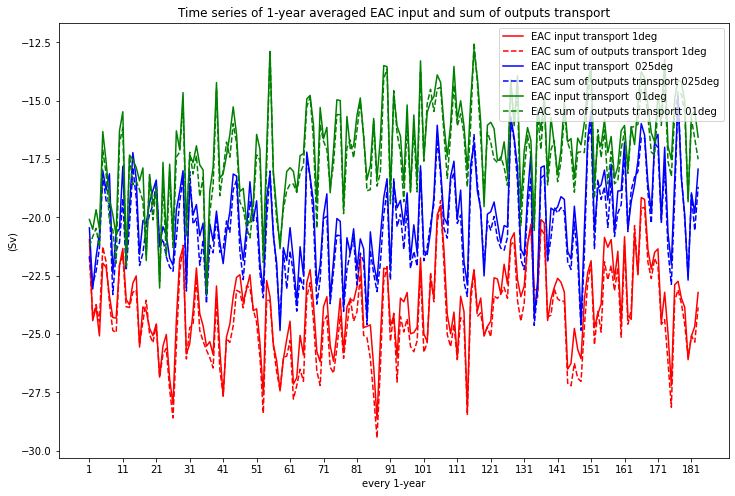

In [10]:
time_series_1()

In [15]:
def time_series_1_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x1, 'r',label = 'EAC input transport 1deg')
    plt.plot(t1,y1, 'r--',label ='EAC sum of outputs transport 1deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and sum of outputs transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('01')

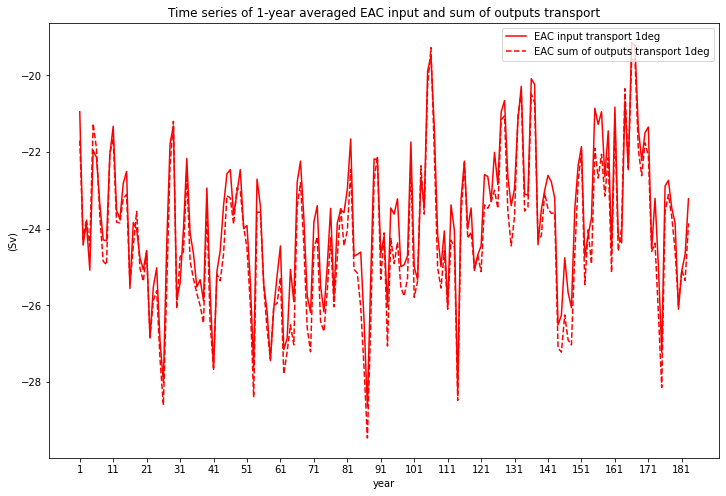

In [16]:
time_series_1_1deg()

In [17]:
def time_series_1_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x2, 'b',label = 'EAC input transport  025deg')
    plt.plot(t1,y2, 'b--',label ='EAC sum of outputs transport 025deg')

    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and sum of outputs transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('02')

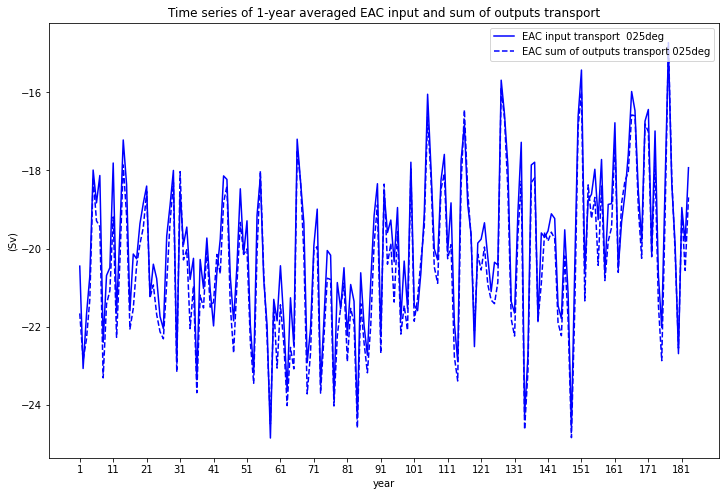

In [18]:
time_series_1_025deg()

In [19]:
def time_series_1_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x3, 'g',label = 'EAC input transport  01deg')
    plt.plot(t1,y3, 'g--',label ='EAC sum of outputs transportt 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and sum of outputs transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')

    savefigure('03')

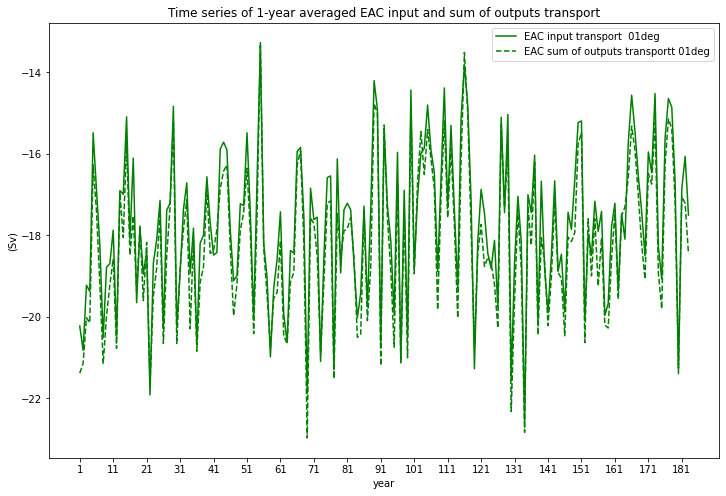

In [20]:
time_series_1_01deg()

### Time sries plot for FE and AB_BC transport

In [25]:
def time_series_1_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x1, 'r',label = 'EAC input transport 1deg')
    plt.plot(t1,y1, 'r--',label ='EAC AB_BC transport 1deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and AB_BC transport)')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('Time series of 1-year averaged EAC input and AB_BC transport 1deg')

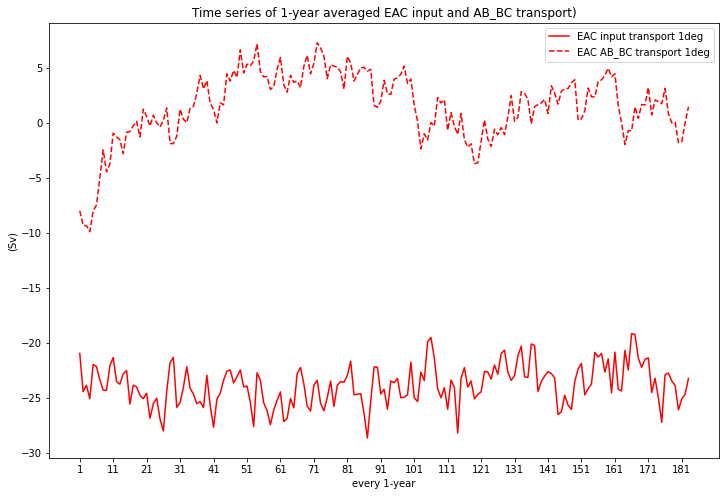

In [26]:
time_series_1_1deg()

In [27]:
def time_series_1_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x2, 'b',label = 'EAC input transport  025deg')
    plt.plot(t1,y2, 'b--',label ='EAC AB_BC transport 025deg')

    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and AB_BC transport)')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('Time series of 1-year averaged EAC input and AB_BC transport 025deg')

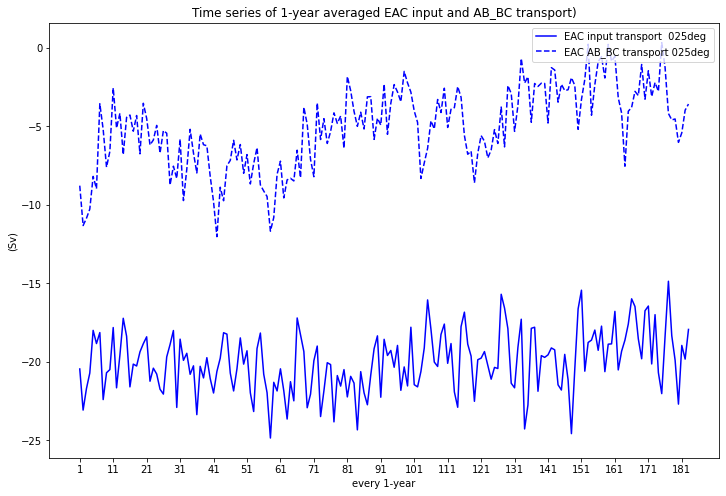

In [28]:
time_series_1_025deg()

In [29]:
def time_series_1_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x3, 'g',label = 'EAC input transport  01deg')
    plt.plot(t1,y3, 'g--',label ='EAC AB_BC transportt 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged EAC input and AB_BC transport)')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('Time series of 1-year averaged EAC input and AB_BC transport 01deg')

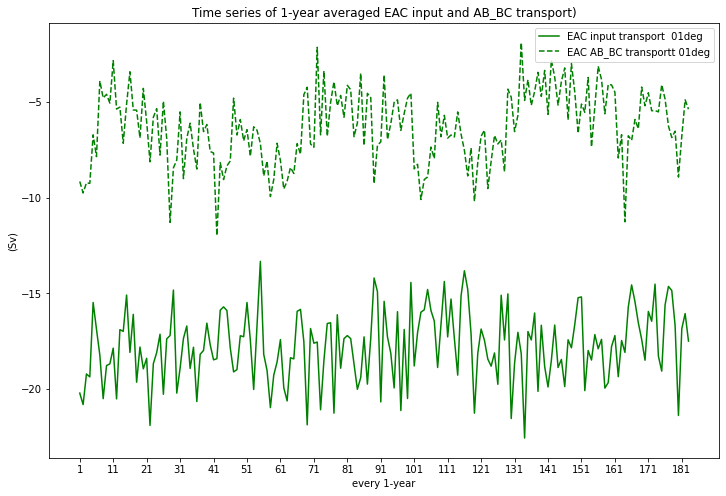

In [30]:
time_series_1_01deg()

### Sea level rise

In [6]:
def linear_trend(x):
    date = x.time
    ndate = np.arange(len(date))
    pf = np.polyfit(ndate, x, 1)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(pf[0])

In [7]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)
# cmp = plt.get_cmap('gist_ncar_r')  # confusing with the most common form of colourblindness (deuteranomaly)
cmp = plt.get_cmap('seismic')

In [ ]:
%%time
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2019/01/01')

for i, ekey in enumerate(data.keys()):

    
    print(ekey)


    # load data for each time interval
    expt = data[ekey]['expt']


    sl = cc.querying.getvar(expt, variable='sea_level', 
                            session=session, frequency='1 monthly',
                            start_time=str(tstart.year), 
                            end_time=str(tend.year)).sel(time=slice(tstart,tend)).compute()

    # stack lat and lon into a single dimension called allpoints
    stacked = sl.stack(allpoints=['yt_ocean','xt_ocean'])
    # apply the function over allpoints to calculate the trend at each point
    trend = stacked.groupby('allpoints').apply(linear_trend)
    # unstack back to lat lon coordinates
    trend_unstacked_sl = trend.unstack('allpoints')


    plt.figure(figsize(12,6))

    # clev = np.arange(-1e-4,1e-4,1e-5)

    ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
    ax.add_feature(land_50m)
    # ax.set_extent([-250, -50, -60, 10], crs=ccrs.PlateCarree())

    gridlines = ax.gridlines(draw_labels=True) # add gridlines
    gridlines.xlines = False 
    gridlines.ylines = False # do not show x and y liene, necause we only want to add the longitude and latitude.
    gridlines.right_labels = False
    gridlines.top_labels = False
    p1 = trend_unstacked_sl.plot(cmap=cmp, extend='both',
                                # vmin=-10e-5, vmax=10e-5,
                                add_colorbar=False, transform=ccrs.PlateCarree())
    p1.cmap.set_over(color=cmp(255), alpha=None)
    plt.title('rate of sea level change')


    ax2 = plt.axes([0.93,0.25,0.01,0.5])
    cb = plt.colorbar(p1,cax=ax2, orientation='vertical')
    cb.ax.set_ylabel('sea level change (m/month)')

    savefigure('map of rate of sea level change' + data[ekey]['desc'])

1deg_c1
025deg_c1
01deg_c1
